<a href="https://colab.research.google.com/github/techsoft29/Data_Analytics/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

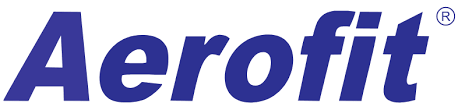
# **Aerofit Business Case Study**

**Objectives**:

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


**Dataset Provided**:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

# **Product Portfolio**:

The **KP281** is an entry-level treadmill that sells for **$1,500**.

The **KP481** is for mid-level runners that sell for **$1,750**.

The **KP781** treadmill is having advanced features that sell for **$2,500**.

In [44]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 12.9MB/s]


In [2]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 4)
sns.set_style('darkgrid')


***1. Checking structure and characteristics of the dataset***

In [3]:
df=pd.read_csv("aerofit_treadmill.csv?1639992749")
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values found

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

Out of 9 Columns: 3 Categorical data, 6 Numerical data

In [8]:
#number of unique attributes in our data
for i in df.columns:
  print(i,':',df[i].unique())

Product : ['KP281' 'KP481' 'KP781']
Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender : ['Male' 'Female']
Education : [14 15 12 13 16 18 20 21]
MaritalStatus : ['Single' 'Partnered']
Usage : [3 2 4 5 6 7]
Fitness : [4 3 2 1 5]
Income : [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles : [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [9]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


This gives the count of all unique attributes:

Product : 3, Age : 32, Gender : 2, Education : 8, MaritalStatus : 2, Usage : 6, Fitness : 5, Income : 62, Miles : 37

**Product Analysis**

In [10]:
a=df.Product.value_counts()
a1=pd.DataFrame(a)
Price=[1500,1750,2500]
a1["Price"]=Price
Sales=a1["Product"]*a1["Price"]
a1["Sales"]=Sales
a1

,Product,Price,Sales
KP281,80,1500,120000
KP481,60,1750,105000
KP781,40,2500,100000


As far as the sales of the product is concerned, we can see that the Sales of KP281 is the highest at **$120000** as compared to the sales of the other two treadmill variants

In [11]:
df[df["Product"]=="KP281"].value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
         19   Female  14         Partnered      4      3        30699   66       1
         32   Male    14         Partnered      4      3        52302   85       1
              Female  14         Single         3      4        46617   113      1
         31   Male    14         Partnered      2      2        54576   47       1
                                                                                ..
         24   Male    13         Partnered      3      2        42069   47       1
              Female  16         Single         4      3        46617   75       1
                                                                42069   94       1
                                 Partnered      5      5        44343   188      1
         50   Female  16         Partnered      3      3        64809   66       1
Length: 8

In [12]:
df[df["Product"]=="KP481"].value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP481    19   Male    14         Single         3      3        31836   64       1
         20   Female  14         Partnered      3      3        34110   106      1
         29   Female  14         Partnered      3      3        51165   95       1
         30   Female  13         Single         4      3        46617   106      1
                      14         Single         3      3        57987   74       1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
         32   Male    16         Partnered      3      3        53439   95       1
                                 Single         4      3        60261   127      1
         33   Female  16         Partnered      2      3        50028   85       1
         

In [13]:
df[df["Product"]=="KP781"].value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP781    22   Male    14         Single         4      3        48658   106      1
                      16         Single         3      5        54781   120      1
         28   Female  18         Partnered      6      5        92131   180      1
              Male    18         Partnered      7      5        77191   180      1
                                 Single         6      5        88396   150      1
         29   Male    14         Partnered      7      5        85906   300      1
                      18         Single         5      5        52290   180      1
         30   Female  16         Partnered      6      5        90886   280      1
              Male    18         Partnered      5      4        103336  160      1
                                                       5        99601   150      1
         31   Male    16         Partnered      6      5        89641   260      1
         

***2. Detecting Outliers***

In [14]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [15]:
Mean=df.mean()
Median=df.median()
Difference=Mean-Median
Difference

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

In [16]:
Mean

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [17]:
Median

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

It is observed here that Income has the highest difference between Mean and Median values and providing more outliers than any other segment.
Miles and Age follows with some outliers

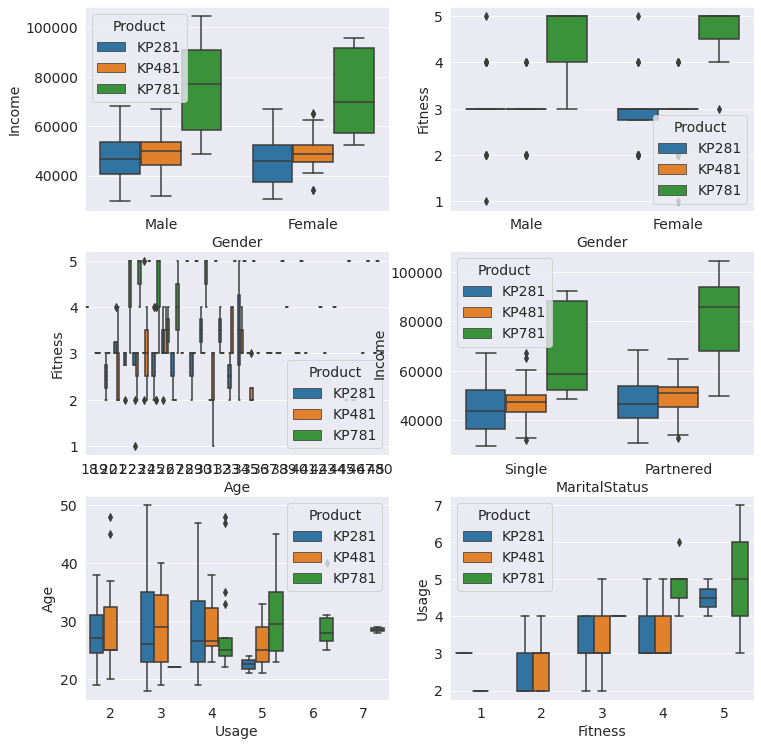

In [18]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 7))
fig.subplots_adjust(top=1.5)
sns.boxplot(x="Gender", y="Income", hue="Product", data=df, ax=axis[0,0])
sns.boxplot(x="Gender", y="Fitness", hue="Product", data=df, ax=axis[0,1])
sns.boxplot(y="Fitness", x="Age", hue="Product", data=df, ax=axis[1,0])
sns.boxplot(y="Income", x="MaritalStatus", hue="Product", data=df, ax=axis[1,1])
sns.boxplot(y="Age", x="Usage", hue="Product", data=df, ax=axis[2,0])
sns.boxplot(y="Usage", x="Fitness", hue="Product", data=df, ax=axis[2,1])
plt.show()

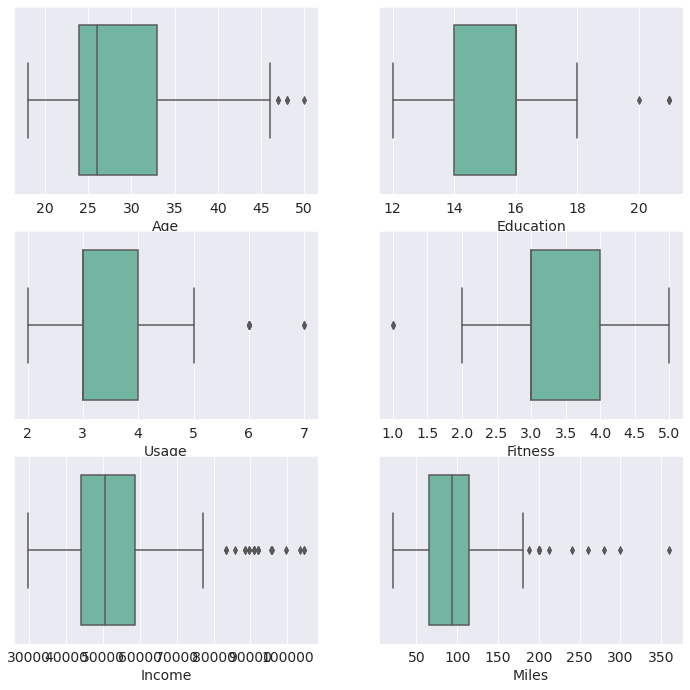

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
fig.subplots_adjust(top=1.6)
sns.set(style="darkgrid", palette="Set2")
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Boxplot shows the visualizations of the outliers:

Income plot gives a higher IQR as compared to any other plots.

Larger values indicate that the central portion of the data is spread out further.

Whereas the outliers in other plots are comparatively lesser followed by Miles and Age

***3. Different MaritalStatus, Age affect on Product Sales***

In [20]:
pd.crosstab(index=df["MaritalStatus"], columns=df["Product"], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


It is observed that customers with Partners buys treadmills more at 59.44% as compared to Singles at 40.56%; However KP281 is more popular in Partnered at 26.7% out of 59.44% as well as Single owners at 17.78% out of 40.56%

In [21]:
Age_wise=pd.crosstab(index=df["Product"], columns=df["Age"], margins=True, normalize=True)*100
Age_wise.max()

Age
18       0.555556
19       2.222222
20       2.777778
21       3.888889
22       3.888889
23      10.000000
24       6.666667
25      13.888889
26       6.666667
27       3.888889
28       5.000000
29       3.333333
30       3.888889
31       3.333333
32       2.222222
33       4.444444
34       3.333333
35       4.444444
36       0.555556
37       1.111111
38       3.888889
39       0.555556
40       2.777778
41       0.555556
42       0.555556
43       0.555556
44       0.555556
45       1.111111
46       0.555556
47       1.111111
48       1.111111
50       0.555556
All    100.000000
dtype: float64

It is observed that customers aged at 25 and 23 years projects higher sales from 
a wide age category ranging from 18 years to 50 years

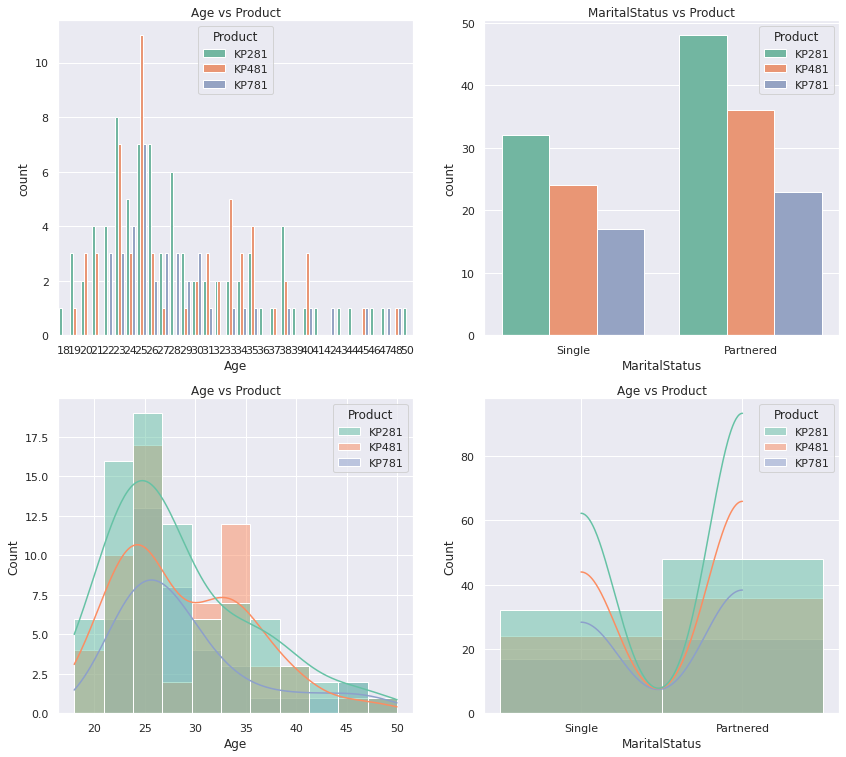

In [22]:
sns.set_style(style='darkgrid')
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,7))
fig.subplots_adjust(top=1.5)

sns.countplot(data=df, x='Age', hue='Product', ax=axs[0][0]).set_title("Age vs Product", pad=4, fontsize=12)
sns.countplot(data=df, x='MaritalStatus', hue='Product', ax=axs[0][1]).set_title("MaritalStatus vs Product", pad=4, fontsize=12)
sns.histplot(data=df, x="Age", hue="Product",  kde=True, ax=axs[1][0]).set_title("Age vs Product", pad=4, fontsize=12)
sns.histplot(data=df, x="MaritalStatus", hue="Product",  kde=True, ax=axs[1][1]).set_title("Age vs Product", pad=4, fontsize=12);

plt.show()

The visualizations provided for Age vs Product and Marital Status vs Product

Age vs Product follows a right skewed distribution which depicts sales trend is higher among the youth

***4.Marginal Probability: What percent of customers have purchased which products***

In [23]:
pd.crosstab(index=df["Product"], columns=df["Gender"], margins=True, normalize=True)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


It is observed that Male owners with 57.78% are more as compared to Female owners with 42.22%; Further we can see both Male and Female owners prefer KP281 and KP781 is 6times popular among Male owners as compared to Female owners

In [24]:
pd.crosstab(index=df["Product"], columns=df["Usage"], margins=True, normalize=True)*100

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.555556,20.555556,12.222222,1.111111,0.000000,0.000000,44.444444
KP481,7.777778,17.222222,6.666667,1.666667,0.000000,0.000000,33.333333
KP781,0.000000,0.555556,10.000000,6.666667,3.888889,1.111111,22.222222
All,18.333333,38.333333,28.888889,9.444444,3.888889,1.111111,100.000000


Going by the most likely to be used ratings i.e 3 days in a week at 38.33% we can say that KP281 is most desirable; KP781 is the only category desired to be used daily

In [25]:
pd.crosstab(index=df["Product"], columns=df["Fitness"], margins=True, normalize=True)*100

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.555556,7.777778,30.000000,5.000000,1.111111,44.444444
KP481,0.555556,6.666667,21.666667,4.444444,0.000000,33.333333
KP781,0.000000,0.000000,2.222222,3.888889,16.111111,22.222222
All,1.111111,14.444444,53.888889,13.333333,17.222222,100.000000


It is observed that customers with fitness band 3 are likely to buy KP281 and KP481; Customers with fitness band 5 relies mostly on KP781

In [26]:
income_cond=pd.crosstab(index=df["Product"], columns=df["Income"], margins=True, normalize=True)*100
income_cond

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,88396,89641,90886,92131,95508,95866,99601,103336,104581,All
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.555556,0.555556,0.555556,1.666667,1.111111,2.777778,1.666667,1.111111,1.666667,1.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.444444
KP481,0.000000,0.000000,0.555556,1.111111,1.666667,0.000000,0.555556,0.000000,1.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333
KP781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.111111,1.111111,1.666667,1.666667,0.555556,0.555556,0.555556,0.555556,1.111111,22.222222
All,0.555556,0.555556,1.111111,2.777778,2.777778,2.777778,2.222222,1.111111,2.777778,1.111111,...,1.111111,1.111111,1.666667,1.666667,0.555556,0.555556,0.555556,0.555556,1.111111,100.000000


Max salary of a customer $104581

Min Salary of a customer is $29562

Mean Salary of a customer is $53719

Median Salary of a customer $50596.5

In [27]:
income_melt=df[['Income']].melt().value_counts()
# pd.crosstab(index=df["Product"], columns=df["Income"], margins=True, normalize=True)*100
income_melt


variable  value
Income    45480    14
          52302     9
          46617     8
          53439     8
          54576     8
                   ..
          53536     1
          54781     1
          58516     1
          55713     1
          29562     1
Length: 62, dtype: int64

It is observed that there are 14 orders from customers having $45480 as salary which is the highest 

followed by $52302 and

 $46617 salaries with 9 and 8 ordersrespectively. We can refer the histograms for product segmentation in salaries.

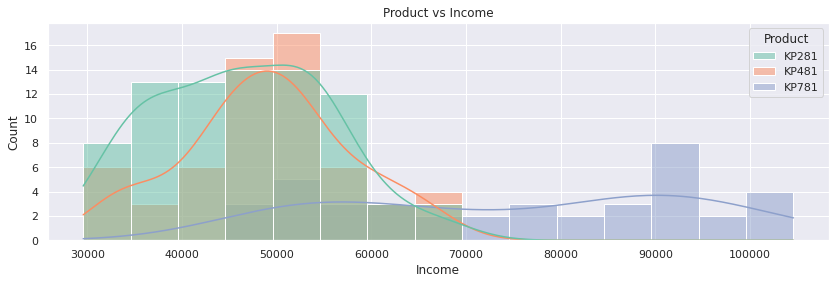

In [28]:
Income_effect = sns.histplot(data=df, x="Income", hue="Product", kde = True).set_title("Product vs Income");

High Salaried customers above $70000 prefer KP781

Customers salaried under $70000 gives a mixed trend between KP281 and KP481

In [29]:
Miles_cond=pd.crosstab(index=df["Product"], columns=df["Miles"], margins=True, normalize=True)*100
Miles_cond.max()

Miles
21       0.555556
38       1.666667
42       2.222222
47       5.000000
53       3.888889
56       3.333333
64       3.333333
66       5.555556
74       1.666667
75       5.555556
80       0.555556
85      15.000000
94       4.444444
95       6.666667
100      3.888889
103      1.666667
106      5.000000
112      0.555556
113      4.444444
120      1.666667
127      2.777778
132      1.111111
140      0.555556
141      1.111111
150      2.222222
160      2.777778
169      0.555556
170      1.666667
180      3.333333
188      0.555556
200      3.333333
212      0.555556
240      0.555556
260      0.555556
280      0.555556
300      0.555556
360      0.555556
All    100.000000
dtype: float64

Customers planning to cover 85kms of runs are most to purchase any of then items.

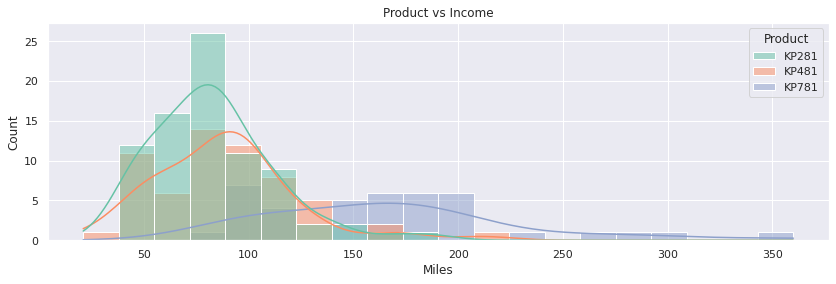

In [30]:
Miles_effect = sns.histplot(data=df, x="Miles", hue="Product", kde = True).set_title("Product vs Income");

It is observed that Miles vs Product distribution is right skewed which means customers planning to run upto 90-100 kms tend to prefer KP281 and KP481 and customers planning to run longer distances prefer KP781.

In [31]:
Fit_cond=pd.crosstab(index=df["Product"], columns=df["Fitness"], margins=True, normalize=True)*100
Fit_cond.max()

Fitness
1        1.111111
2       14.444444
3       53.888889
4       13.333333
5       17.222222
All    100.000000
dtype: float64

Customers within Fitness band 3 are more likelier to buy the treadmill

In [32]:
Edu_wise=pd.crosstab(index=df["Product"], columns=df["Education"], margins=True, normalize=True)*100
Edu_wise.max()

Education
12       1.666667
13       2.777778
14      30.555556
15       2.777778
16      47.222222
18      12.777778
20       0.555556
21       1.666667
All    100.000000
dtype: float64

Potetial customers for this treadmill could have attained 16 years or 14 years of education

While its very rare customers educated above of age 20-21 would likely buy any of the treadmills 

***5. Correlation***

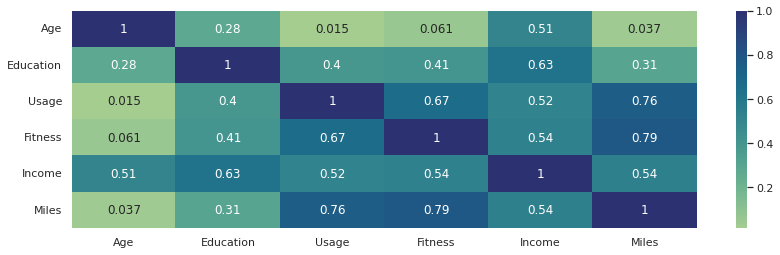

In [33]:
hb=sns.heatmap(df.corr(), annot=True, cmap="crest")

Numbers in the plot depicts std deviations greater than the mean of the parameter. Closer it is to 1(darker the color) closely correlated the parameters are. 

From the heat map we can conlude that parameters such as Age and Income is closely related, likewise Education and Income, Usage and Fitness, Usage and Income, Usage and Miles, Fitness and Income, Fitness and Miles, Income and Miles respectively are closely related (greater than 0.5)

However Age and Fitness, Age and Miles, Age and Usage, Age and Education are not closely related to each other respectively (less than 0.3)

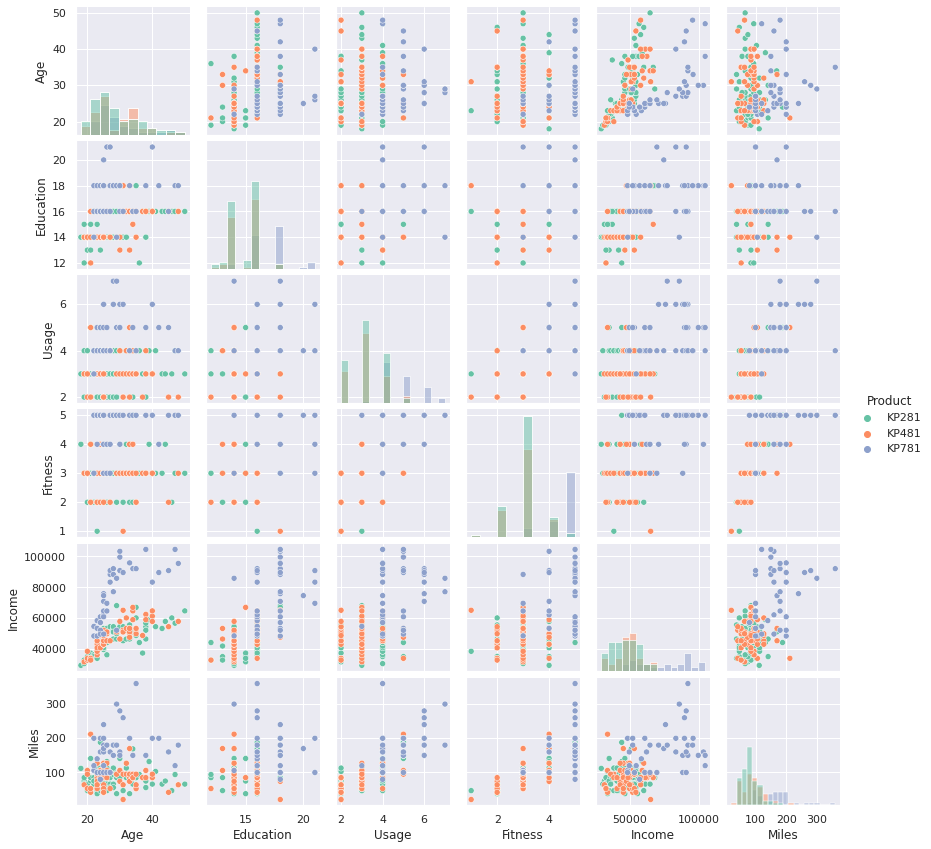

In [34]:
sns.pairplot(df, hue="Product", diag_kind="hist", height=2.0)

The bivariariate distributions provided by the pairplot gives a complete visualization on the popularity/ purchase of different product categories as per the parameters provided. 

Bluedots-KP281

Orangedots-KP481

Greendots-KP781

***6. Categorization of Users***

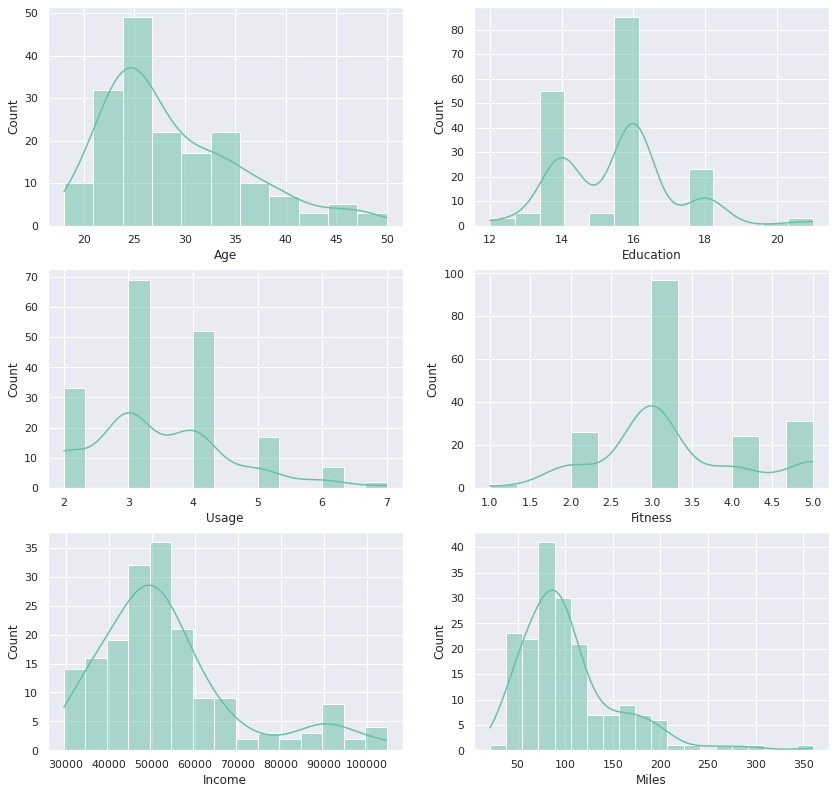

In [35]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))
fig.subplots_adjust(top=1.6)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

It is observed that most of the distributions are skewed towards the right except Education and Fitness. 

Most customers are educated for 16 years and fall in the fitness band 3

Median:

Age group is 25 years

Income lies in around $50000

Miles planned to be covered 90 

Plans to use 3days per week

In [36]:
melted = df[['Product', 'Gender', 'MaritalStatus']].melt().reset_index()
melted.groupby(['variable', 'value'])[['value']].count()*100/len(df)

value
variable      value               
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222

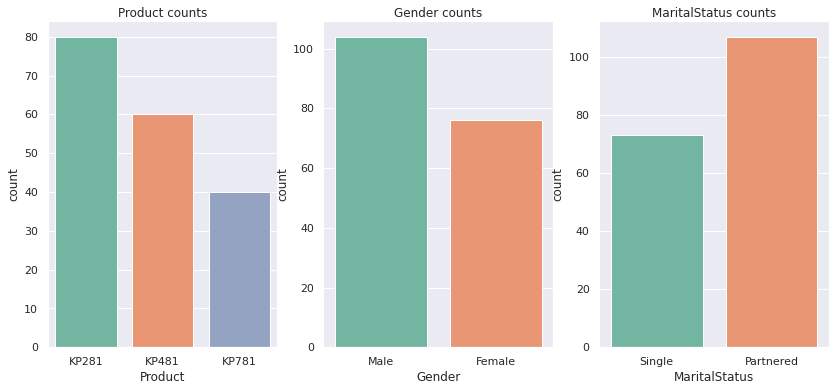

In [37]:
sns.set_style(style='darkgrid')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
sns.countplot(data=df, x='Product', ax=axs[0]).set_title("Product counts", pad=4, fontsize=12)
sns.countplot(data=df, x='Gender', ax=axs[1]).set_title("Gender counts", pad=4, fontsize=12)
sns.countplot(data=df, x='MaritalStatus', ax=axs[2]).set_title("MaritalStatus counts", pad=4, fontsize=12)
plt.show()

Visualizations on products sold/purchased as per category, Gender and Marital Status

KP281 is the most trending category

Most of the customers are Male

Partnered customer puchases are more than Singles

Text(0.5, 1.0, 'Age vs Income vs Product')

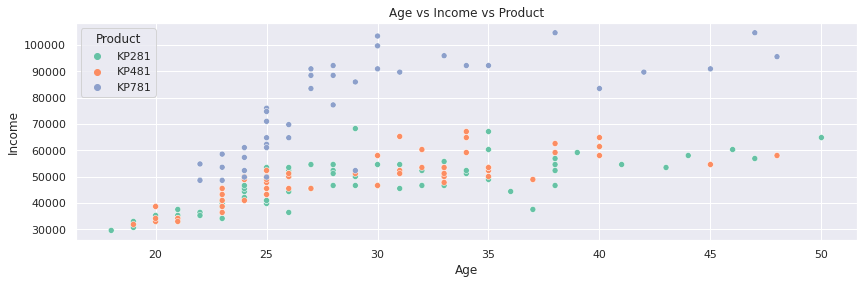

In [38]:
AIP=sns.scatterplot(y = 'Income', x = 'Age', data = df, hue = 'Product').set_title("Age vs Income vs Product")
AIP

It is observed that old aged customers falling in lower salary bracket tend to purchase either KP281 or KP481. Also KP481 is less popular among older aged customers ans compared to KP281 and KP781

Text(0.5, 1.0, 'Age vs Fitness vs Product')

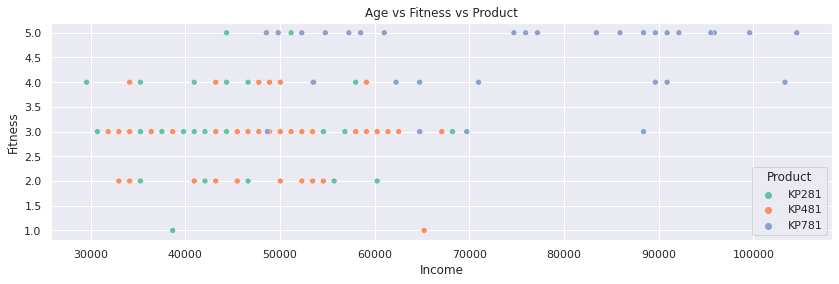

In [39]:
AIF=sns.scatterplot(y = 'Fitness', x = 'Income', data = df, hue = 'Product').set_title("Age vs Fitness vs Product")
AIF

Another insight is obtained that high income customers are more fitness conscious and rate themselves more in the Fitness band which leads them to purchase KP781. Middle income groups are moderate on fitness and prefer KP481 more. However no top rated purchases on KP481 is seen.

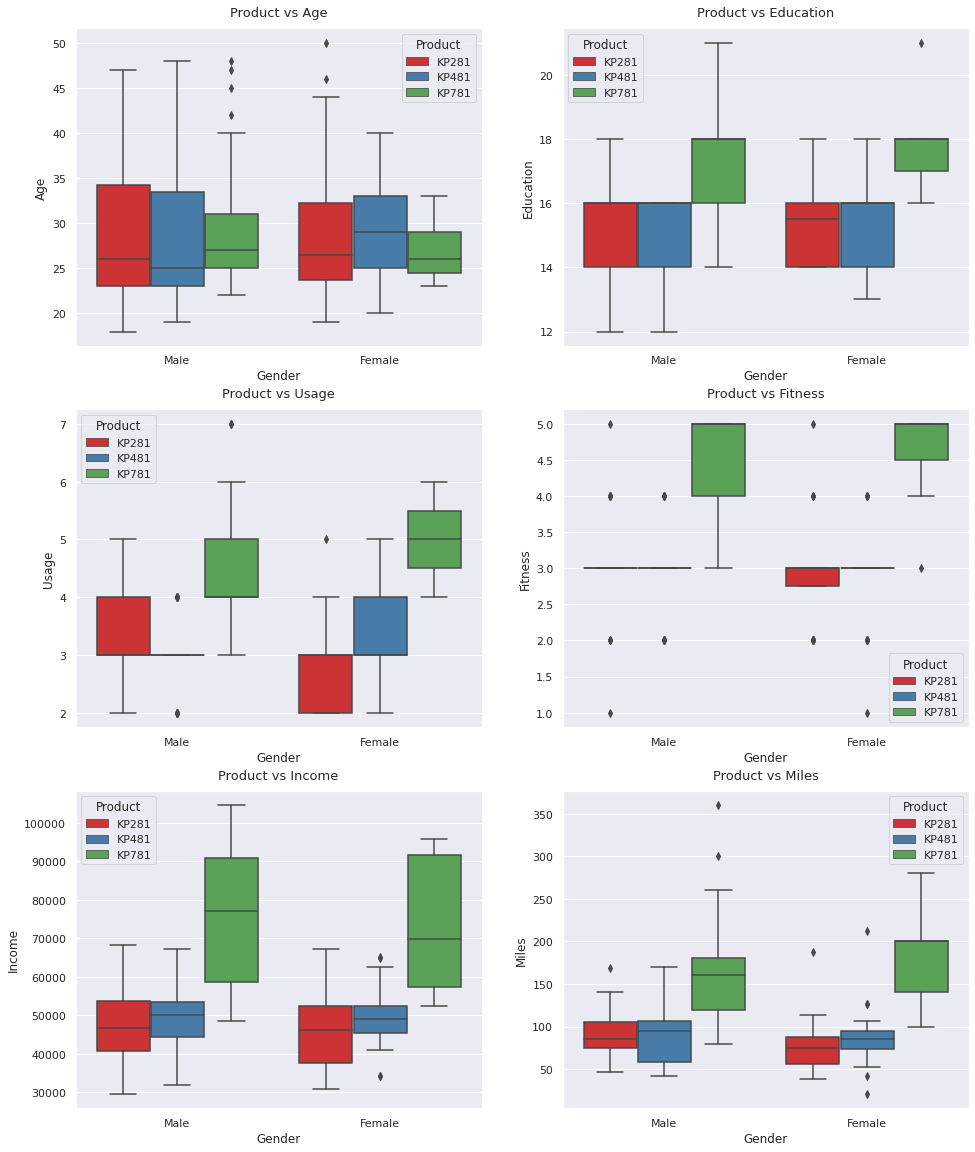

In [40]:
Category = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))
fig.subplots_adjust(top=2)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=Category[count], hue='Product', ax=axs[i,j], palette='Set1')
        axs[i,j].set_title(f"Product vs {Category[count]}", pad=12, fontsize=13)
        count += 1

***8. Marginal Probability and Conditional Probability***

Marginal probability

In [41]:
df['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

Customers prefer KP281 the most at 44.44% among the 3 categories of treadmills followed by KP481 at 33.33% and KP781 at 22.22%

Conditional probability

In [42]:
 def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()  
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Conditional Probability as per the gender of the customer:

Probability of a Male customer buying a treadmill is 58%;
Probability of a Female customer buying a treadmill is 42%

Probability of a Male customer buying a KP281 treadmill is 38%;
Probability of a Male customer buying a KP481 treadmill is 30%;

***6. Probability of a Male customer buying a KP781 treadmill is 32%***

Probability of a Male customer buying a KP281 treadmill is 53%;
Probability of a Male customer buying a KP481 treadmill is 38%;
Probability of a Male customer buying a KP781 treadmill is 9%

In [43]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



Conditional Probability as per the MaritalStatus of the customer:

Probability of a Single customer buying a treadmill is 41%;
Probability of a Partnered customer buying a treadmill is 59%

Probability of a Single customer buying a KP281 treadmill is 44%;
Probability of a Single customer buying a KP481 treadmill is 33%;
Probability of a Single customer buying a KP781 treadmill is 23%

Probability of a Partnered customer buying a KP281 treadmill is 45%;
Probability of a Partnered customer buying a KP481 treadmill is 34%;
Probability of a Partnered customer buying a KP781 treadmill is 21%

***7.Customer Profiling***

KP281 Customers:

Age: Youth 23 years peak
Gender:	Preferred by both Male and Female
Education:	Upto 16 years of education
MaritalStatus: Preferred by both Single and Partnered
Usage:	Preferred 3 days a week
Income:	Mid Less than $70000
Fitness:	Mid bands 3.0
Miles: Planned mostly till 100 

KP481 Customers:

Age: Youth 25 years peak
Gender:	Preferred by both Male and Female
Education:	Upto 18 years of education, Mostly 14 years
MaritalStatus:	Preferred moderately by both Single and Partnered
Usage:	Preferred 3 days a week
Income:	Less than $70000
Fitness:	Mid bands 3.0
Miles: Planned mostly till 100

KP781 Customers:

Age: Youth 25 years peak
Gender:	Preferred more by Male as compared to Female
Education:	Mostly above 15 years of education
MaritalStatus:	Less preferred by both Single and Partnered
Usage:	Preferred 5 days a week
Income:	Above $70000
Fitness: Top bands 5.0
Miles: Planned max above 200

***9. Some recommendations and actionable insights, based on the inferences:***

1. KP781 to be marketed as a premium product as it is preferred mostly by higher income groups and higher fitness band categories (strong correlation between income and fitness); raising the product price could be an option to match sales with the other two categories (or possibly fetch more profit).

2. KP281 is the highest selling product and popular among mid income groups upto $29562. Better banking options may include even lower income categories which could be beneficial in revenue generation.

3. Partnered-25 year old's proves to be a strong customer segment for KP281.

4. Mid income and Moderate fitness enthusiasts a proven market for KP481. However, Fitness is not exactly correlated to Age.

5. Usage upto 3days a week and runs upto 85-100 miles need to be kept as benchmarks for the tech team to provide smooth service without any failures and maintenance as high percentage of customer base prefer this requirement in KP281 and KP481.

6. Popularity of KP781 among Single-High net Income-Fitness enthusiastic Women is considerably low, successful marketing campaigns towards this segment could improve the sales for this product.
